In [1]:
%pylab inline
import os
import pandas as pd
import numpy as np
from ipypublish import nb_setup

Populating the interactive namespace from numpy and matplotlib


In [2]:
###한글 폰트###
from matplotlib import rcParams
from matplotlib import font_manager, rc

rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_csv("household_2020a.csv")

In [5]:
df.head(3)

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2


In [6]:
df1 = df.loc[df['number'].isin([1])  & (df['age']>30) & (df['age'] < 40) ]

In [7]:
df2 = df1[['sex', 'number', 'age','income']]

In [8]:
df2.tail(3)

,sex,number,age,income
17599,2,1,37,5896
17696,1,1,37,1370
18014,2,1,34,5382


In [9]:
df2.columns

Index(['sex', 'number', 'age', 'income'], dtype='object')

In [10]:
df21 = df2.loc[df2['sex'].isin([1])]

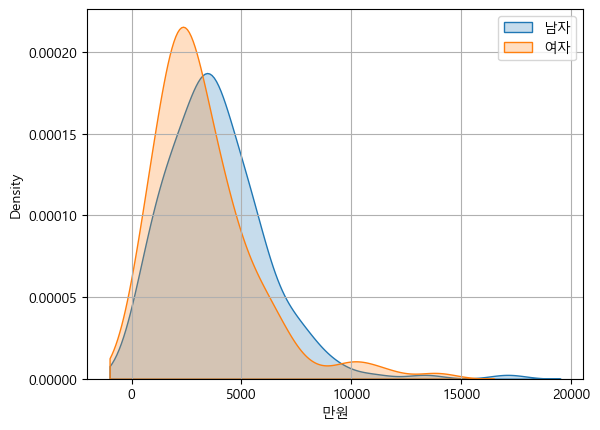

In [11]:
import seaborn as sns

df21 = df2.loc[df2['sex'].isin([1])]
df22 = df2.loc[df2['sex'].isin([2])]

sns.kdeplot(df21['income'], shade=True, label='남자', clip=(-1000, 20000)) 
sns.kdeplot(df22['income'], shade=True, label='여자', clip=(-1000, 20000))  
plt.xlabel('만원')
plt.legend()
plt.grid(True)
plt.savefig("30대1인가구소득분포히스토그램.png", dpi=150, bbox_inches='tight')
plt.show()

In [12]:
df3 = df2[['income']].groupby(df2['sex']).agg(['mean','std','count'])

In [13]:
df3

income                   
            mean          std count
sex                                
1    3828.284360  2334.489291   211
2    3268.992481  2321.622345   133

## Z 통계량(or t 통계량) = $ \frac{관측된 차이 - 기대된 차이}{통계량의 표준오차}$

In [14]:
df3.columns

MultiIndex([('income',  'mean'),
            ('income',   'std'),
            ('income', 'count')],
           )

In [15]:
mean = df3[('income',  'mean')]

In [16]:
mean

sex
1    3828.284360
2    3268.992481
Name: (income, mean), dtype: float64

In [17]:
type(mean)

pandas.core.series.Series

In [18]:
mean.index

Int64Index([1, 2], dtype='int64', name='sex')

In [19]:
mean[1]

3828.2843601895734

In [20]:
mean_df  =mean[1] -  mean[2]

In [21]:
np.round(mean_df,2)

559.29

In [22]:
#통계량의 표준오차

In [23]:
std = df3[('income',  'std')]

In [24]:
std

sex
1    2334.489291
2    2321.622345
Name: (income, std), dtype: float64

In [25]:
count = df3[('income',  'count')]

In [26]:
count

sex
1    211
2    133
Name: (income, count), dtype: int64

In [27]:
se1 = std[1]/sqrt(count[1])

In [28]:
se1

160.71287063314145

2019년 가구 소득의 표준오차

In [29]:
se2 = std[1]/sqrt(count[1])

In [30]:
se2

160.71287063314145

In [31]:
tot_se = np.sqrt(se1**2 + se2**2)

In [32]:
np.round(tot_se,2)

227.28

In [33]:
z = mean_df/tot_se

In [34]:
round(z, 2) # 귀무가설기각

2.46

In [35]:
import scipy as sp
import scipy.stats

rv = sp.stats.norm(loc=0, scale=1) # 평균0, 표준편차 1, 표준정규분포
np.round(1-rv.cdf(z), 2)

0.01